# BlingBot (Lasha, Baha, Ely)

# Diamonds Dataset Overview

This notebook explores the **Diamonds dataset**, originally scraped around 2008 from a real commercial Loose Diamonds Search Engine. It was later included in Hadley Wickham’s ggplot2 package for educational use.

Source: [https://r-packages.io/datasets/diamonds](https://r-packages.io/datasets/diamonds)  
Origin: Fairfield County Diamonds, Inc. (via online aggregator)


### Target Variable
- Price — the market price of each diamond (in USD)

### Dataset Summary
- Rows 53,940 diamonds  
- Features: carat, cut, color, clarity, depth, table, x (length), y (width), z (height).  
- Goal: Our Exploratory Data Analysis determines how quality characteristics relate to price and uncovers pricing patterns.

## Analysis

General information about the dataset provided below. Note that there are no null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("data/original_data.csv")
print(df.head())

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [4]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [5]:
# plot styles
sns.set(style="whitegrid")
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["figure.figsize"] = (10, 6)

### 1. Carat vs Price Analysis

#### Scatter Plot
- Non-uniform vertical clusters at common carat values (e.g., around 0.3, 0.5, 1.0, 1.5, etc.). Either market-preferred sizes or rounding in measurements.
- Increased price variability as carat grows, especially past 1.5 carats.
- Outliers with high price for relatively lower carats may indicate exceptional diamond quality or mispriced data.

#### Hexbin Density Plot
- The densest region is concentrated around 0.3 to 1.0 carats, with prices around $5,000. most diamonds in the dataset are small-to-medium sized and modestly priced.
- The vertical banding pattern again confirms popular carat sizes and discrete pricing tiers.
- Higher-carat diamonds are less common, and their distribution becomes sparser. This aligns with their rarity and high cost.

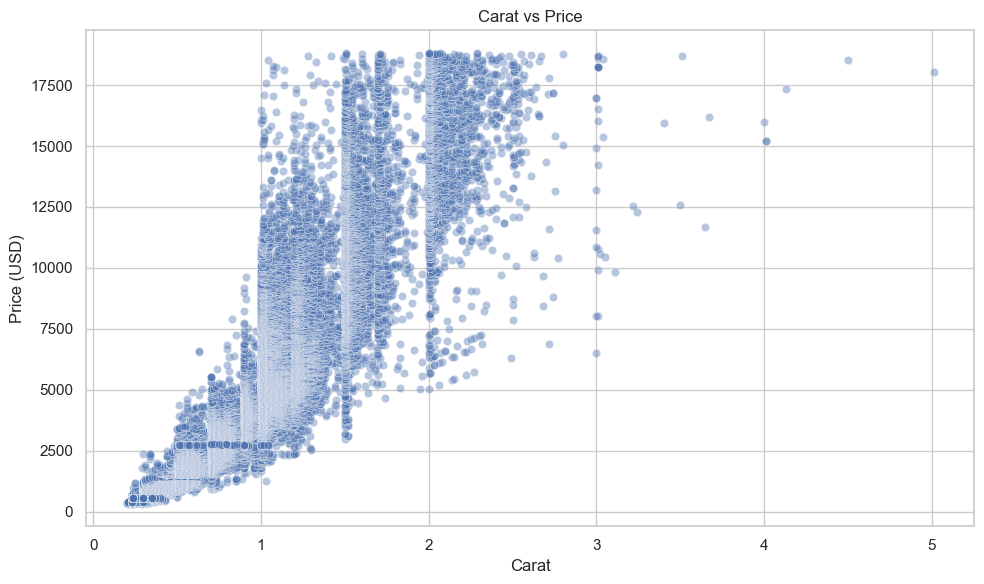

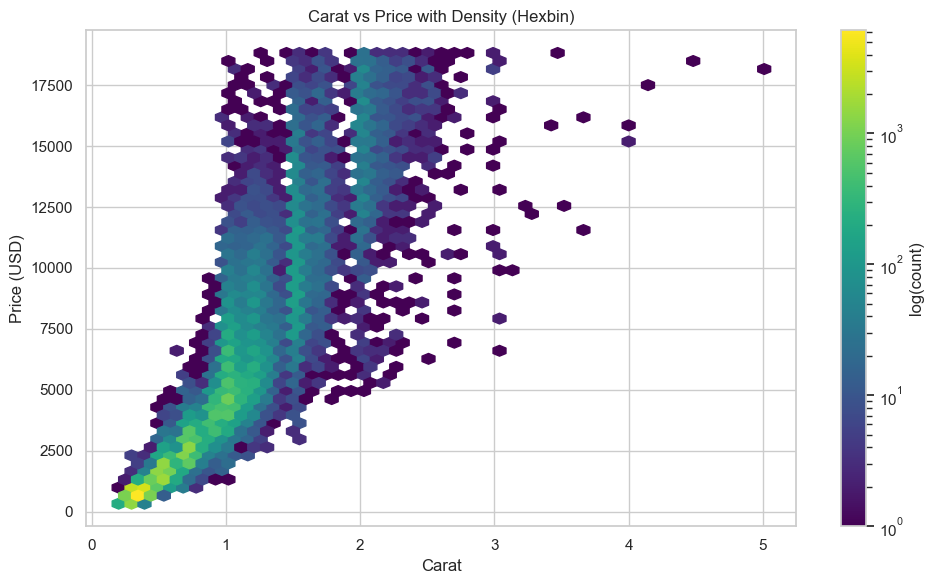

In [6]:
# 1. Carat vs Price 
plt.figure()
sns.scatterplot(data=df, x="carat", y="price", alpha=0.4)
plt.title("Carat vs Price")
plt.xlabel("Carat")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

# carat density map
plt.figure(figsize=(10, 6))
plt.hexbin(df['carat'], df['price'], gridsize=50, cmap='viridis', bins='log')
plt.colorbar(label='log(count)')
plt.title("Carat vs Price with Density (Hexbin)")
plt.xlabel("Carat")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

### 2. Diamond Price and Categorical Features

#### Diamond Price by Cut
- Median price generally increases from Fair to Premium cuts.
- Ideal cut has a lower median price than Premium, unexpected.
- Significant overlap in price ranges across all cut categories.
- Numerous high-price outliers suggest influence from other features like carat or clarity.

#### Diamond Price by Color
- Diamonds with lower color grades (J, I, H) show higher median prices than higher grades (D, E). May happen because of larger carat sizes in lower color grades.
- Wide range of prices within each color category.
- Numerous high-price outliers again.

#### Diamond Price by Clarity
- Lower clarity grades (I1, SI2) have higher median prices than top grades (VVS1, IF). Larger carat sizes in lower-clarity diamonds may be influencing price.
- No clear linear pattern between clarity and price.
- Significant outliers.

#### Distribution of Categorical Features

- Cut: Most diamonds are labeled as Ideal or Premium, while Fair cuts are rare. The distribution is left-heavy.
- Color: The majority of diamonds fall into lower color grades (J, I, H), with fewer diamonds in the top color grades (E, D). This shows an imbalance toward lower grades.
- Clarity: Most diamonds are in the mid-range clarity levels (SI1, VS2), while extremely low (I1) or high (IF) clarity grades are less common.

#### Explaining The Unexpected Trends
- Unexpected price trends in previous plots (lower-quality diamonds having higher prices or price-per-carat for example) are explained by carat differences across quality levels. Lower-quality diamonds often compensate with larger size, while higher-quality ones may be smaller but command a premium per carat.

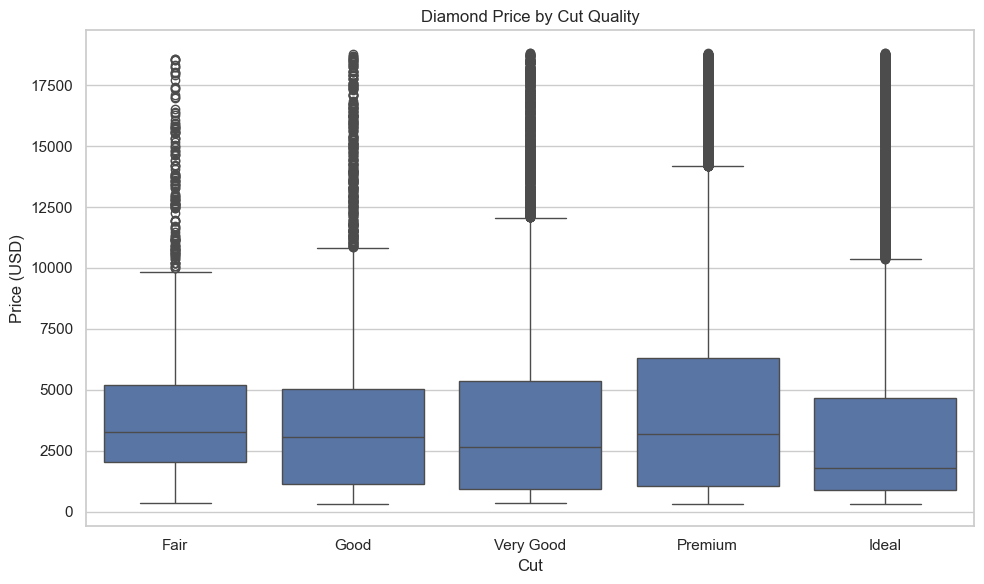

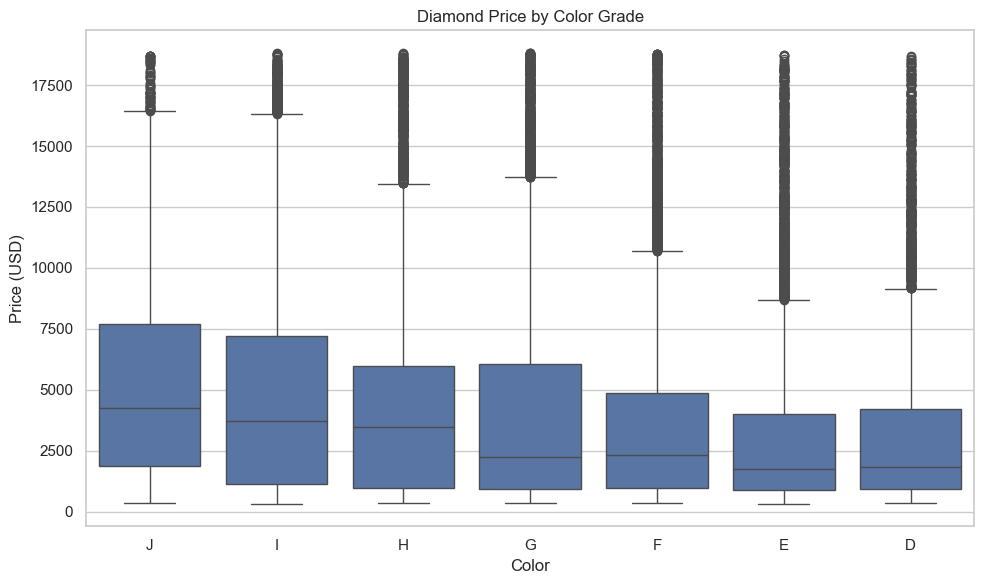

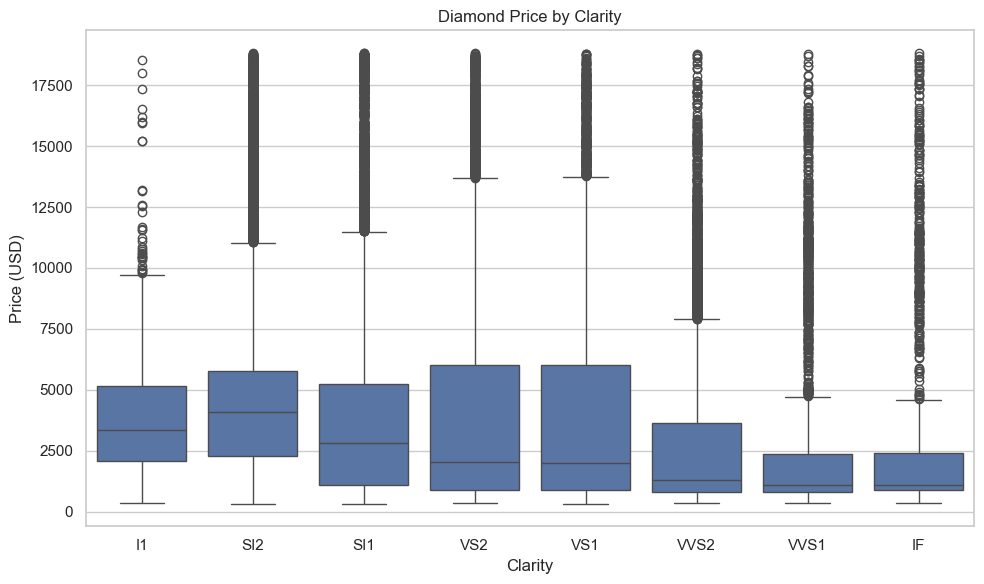

In [7]:
# 2. Box plots for categorical features vs price

# Cut vs Price
plt.figure()
sns.boxplot(data=df, x="cut", y="price", order=["Fair", "Good", "Very Good", "Premium", "Ideal"])
plt.title("Diamond Price by Cut Quality")
plt.xlabel("Cut")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

# Color vs Price
plt.figure()
sns.boxplot(data=df, x="color", y="price", order=["J", "I", "H", "G", "F", "E", "D"])
plt.title("Diamond Price by Color Grade")
plt.xlabel("Color")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

# Clarity vs Price
plt.figure()
sns.boxplot(data=df, x="clarity", y="price", order=["I1", "SI2", "SI1", "VS2", "VS1", "VVS2", "VVS1", "IF"])
plt.title("Diamond Price by Clarity")
plt.xlabel("Clarity")
plt.ylabel("Price (USD)")
plt.tight_layout()
plt.show()

<Axes: xlabel='cut'>

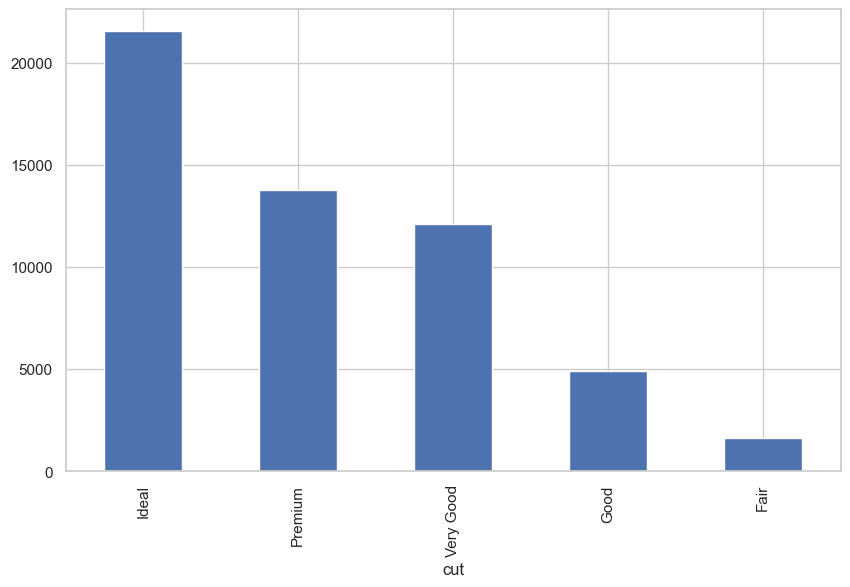

In [8]:
df['cut'].value_counts().plot(kind='bar')

<Axes: xlabel='color'>

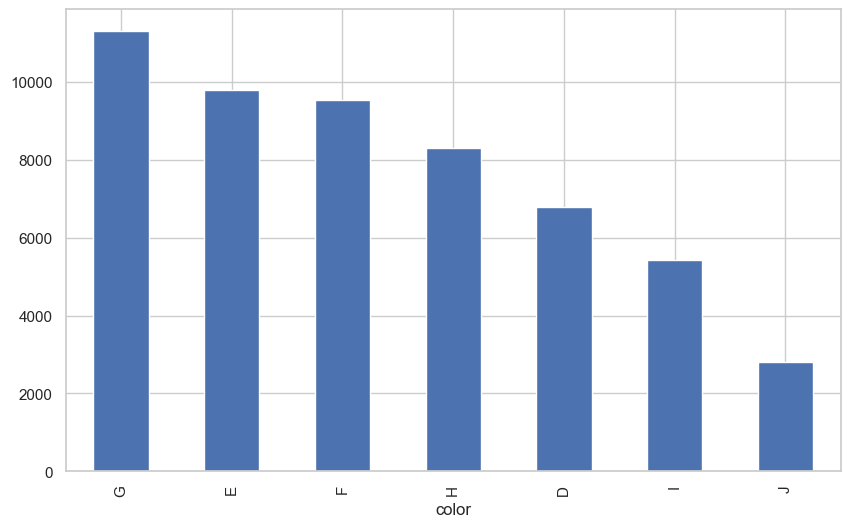

In [9]:
df['color'].value_counts().plot(kind='bar')

<Axes: xlabel='clarity'>

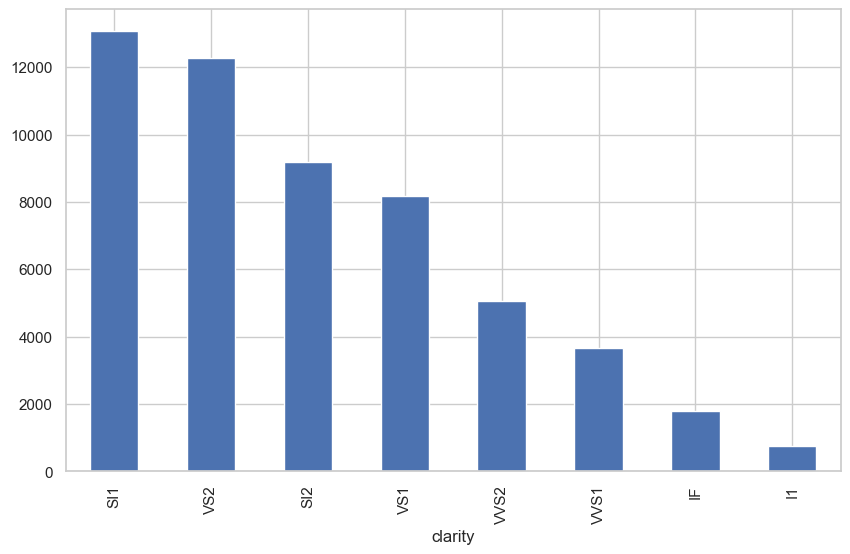

In [10]:
df['clarity'].value_counts().plot(kind='bar')

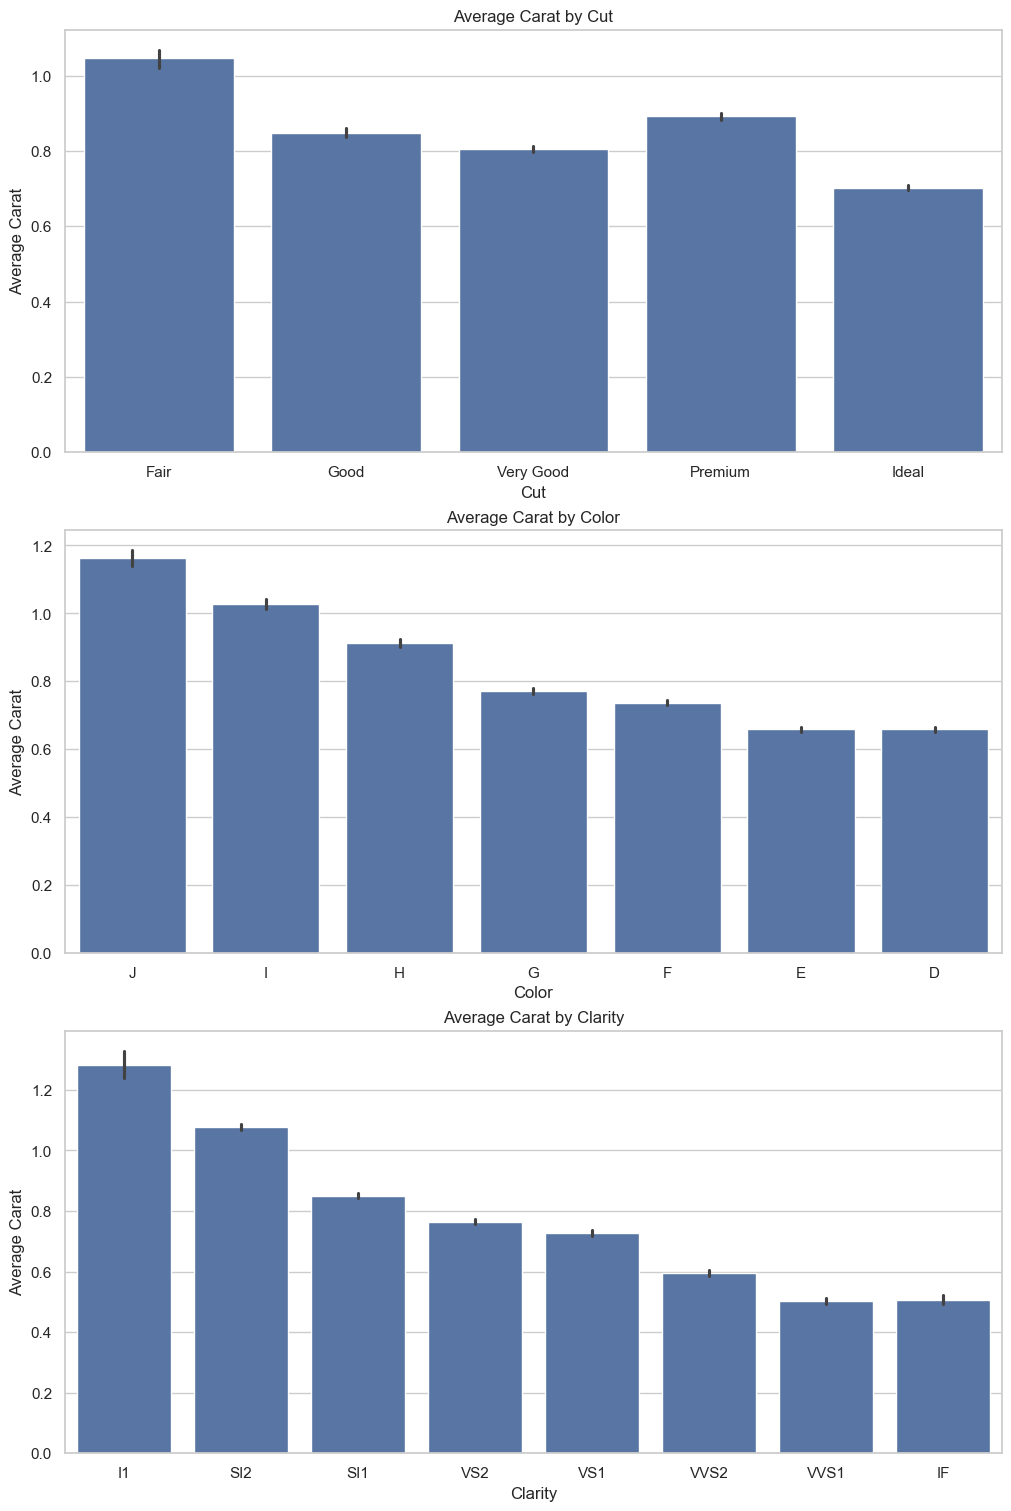

In [11]:
import numpy as np
fig, axes = plt.subplots(3, 1, figsize=(10, 15), constrained_layout=True)

# Average Carat by Cut
sns.barplot(x='cut', y='carat', data=df, estimator=np.mean, ax=axes[0], 
            order=['Fair', 'Good', 'Very Good', 'Premium', 'Ideal'])
axes[0].set_title('Average Carat by Cut')
axes[0].set_ylabel('Average Carat')
axes[0].set_xlabel('Cut')

# Average Carat by Color
color_order = sorted(df['color'].unique(), reverse=True)
sns.barplot(x='color', y='carat', data=df, estimator=np.mean, ax=axes[1], 
            order=color_order)
axes[1].set_title('Average Carat by Color')
axes[1].set_ylabel('Average Carat')
axes[1].set_xlabel('Color')

# Average Carat by Clarity
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.barplot(x='clarity', y='carat', data=df, estimator=np.mean, ax=axes[2], 
            order=clarity_order)
axes[2].set_title('Average Carat by Clarity')
axes[2].set_ylabel('Average Carat')
axes[2].set_xlabel('Clarity')

plt.show()

### 3. Correlation Matrix Analysis

- Price is highly correlated with carat (0.92).
- Price also correlates strongly with x, y, and z (0.86–0.89), the physical dimensions of the diamond, which are themselves highly correlated with carat.
- Carat is nearly perfectly correlated with x (0.98) and also very strongly with y and z (0.95), showing that as carat increases, physical size increases accordingly.
- Depth and table have weak or negative correlations with price and other features:
  - Depth has almost no correlation with price (–0.01).
  - Table has a small positive correlation with price (0.13) but a negative correlation with depth (–0.30).
-  x, y, z, and carat are tightly correlated; may cause redundancy in modeling if used together.

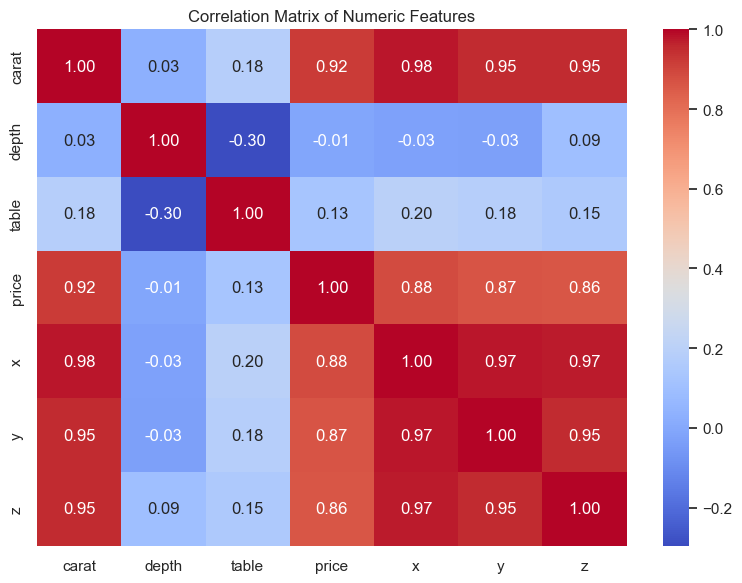

In [12]:
# Correlation heatmap
numeric_cols = ["carat", "depth", "table", "price", "x", "y", "z"]
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numeric Features")
plt.tight_layout()
plt.show()

### 4. Price per Carat Analysis

We are considering price per carat because it could a more informative feature for evaluating value than total price alone. 

- Overall Distribution: The distribution of price per carat is right-skewed.
- By Cut: Diamonds with better cuts (Ideal, Premium) generally have a higher price per carat.
- By Color: Interestingly, lower-quality color grades (J, I) tend to have higher price per carat on average. This may happn because diamonds with lower color but high carat weight skew the ratio. Higher color grades (D, E) show more consistent pricing but slightly lower per-carat averages.
- By Clarity: Price per carat increases with clarity quality, particularly from SI1 to VVS1. The highest clarity category (IF) has some extremely high-priced outliers.

In [13]:
df['price_per_carat'] = df['price'] / df['carat']

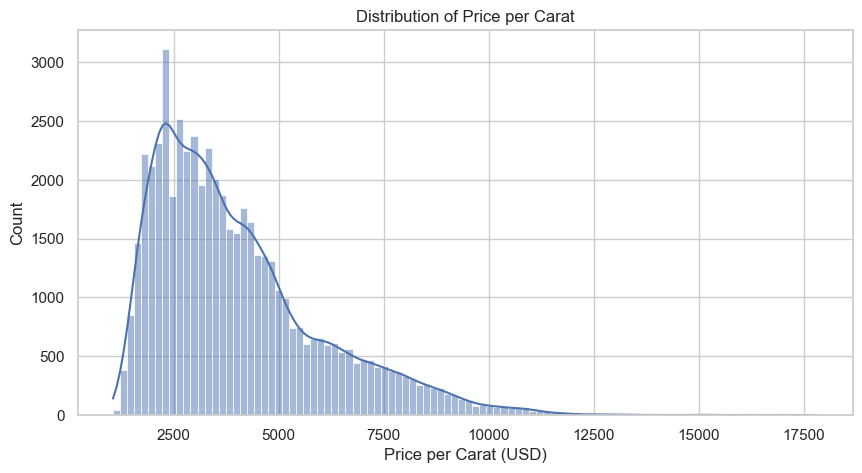

In [14]:
plt.figure(figsize=(10, 5))
sns.histplot(df['price_per_carat'], bins=100, kde=True)
plt.title('Distribution of Price per Carat')
plt.xlabel('Price per Carat (USD)')
plt.ylabel('Count')
plt.show()

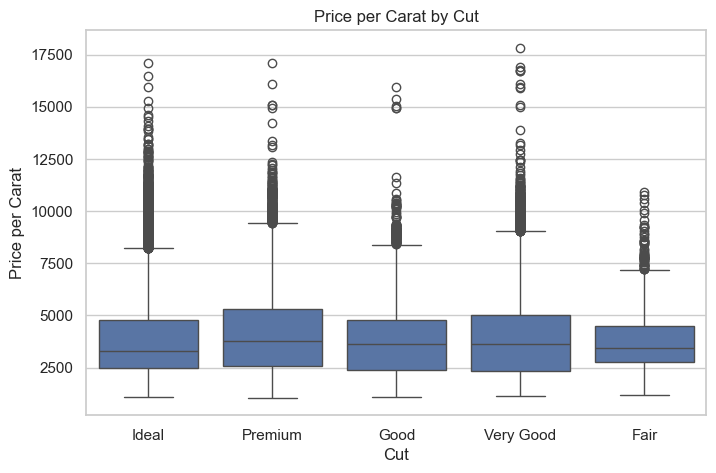

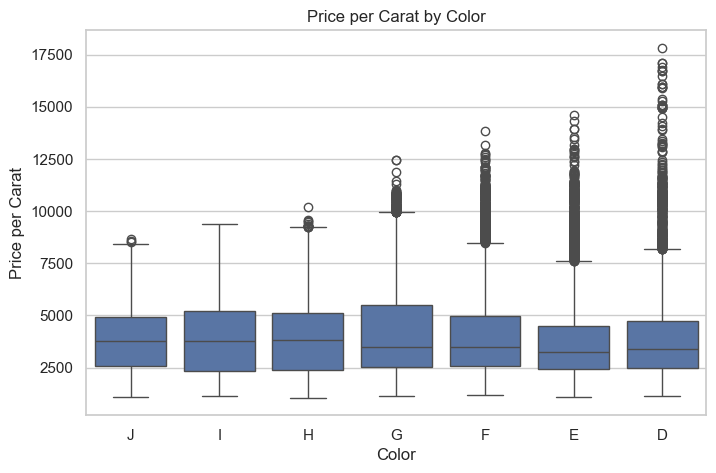

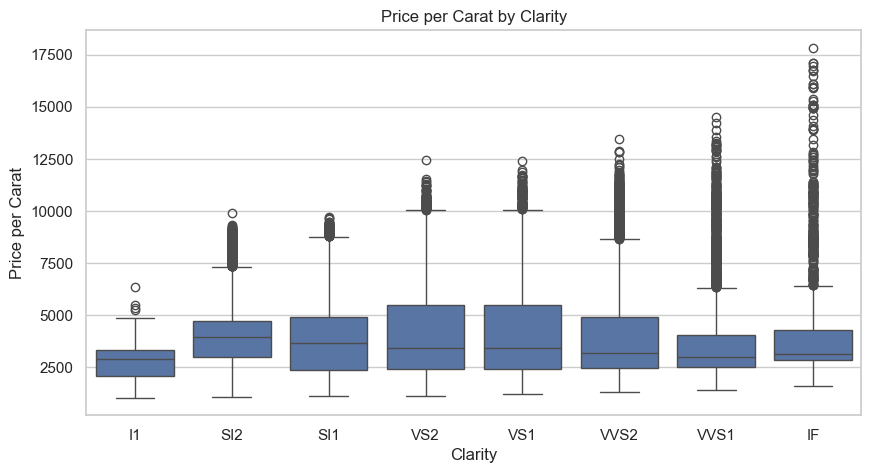

In [15]:
# Boxplot by Cut
plt.figure(figsize=(8, 5))
sns.boxplot(x='cut', y='price_per_carat', data=df)
plt.title('Price per Carat by Cut')
plt.xlabel('Cut')
plt.ylabel('Price per Carat')
plt.show()

# Boxplot by Color
plt.figure(figsize=(8, 5))
sns.boxplot(x='color', y='price_per_carat', data=df, order=sorted(df['color'].unique(), reverse=True))
plt.title('Price per Carat by Color')
plt.xlabel('Color')
plt.ylabel('Price per Carat')
plt.show()

# Boxplot by Clarity
plt.figure(figsize=(10, 5))
sns.boxplot(x='clarity', y='price_per_carat', data=df, order=['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF'])
plt.title('Price per Carat by Clarity')
plt.xlabel('Clarity')
plt.ylabel('Price per Carat')
plt.show()

Volume Statistics:
count    53940.000000
mean       129.849403
std         78.245262
min          0.000000
25%         65.136830
50%        114.808572
75%        170.842451
max       3840.598060
Name: volume, dtype: float64
Zero Volume Entries: 20


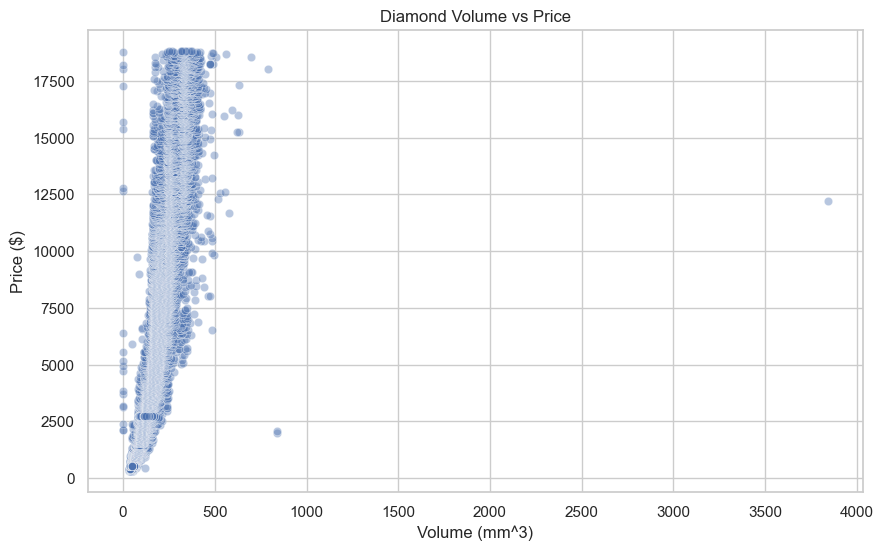

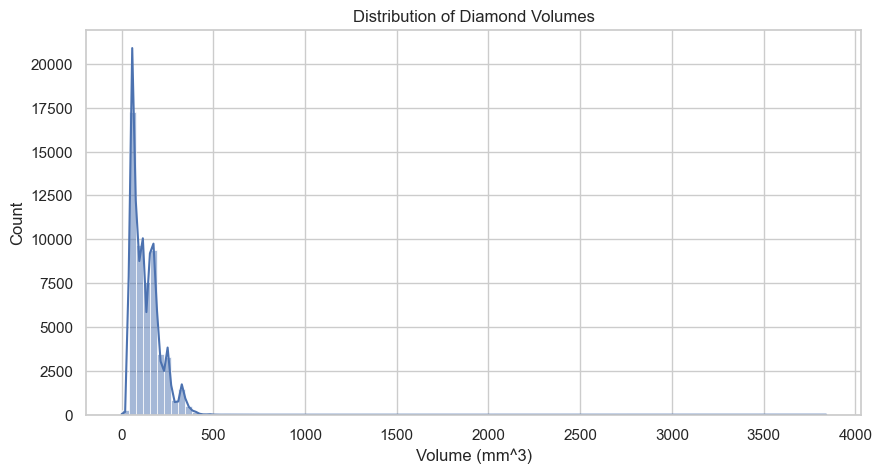

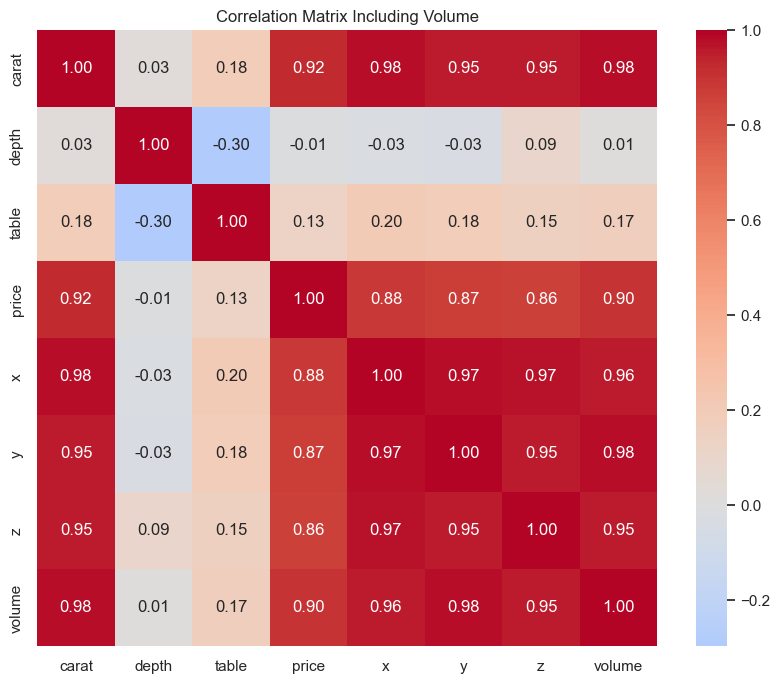

In [16]:
# 5. Volume Feature Analysis

# Create Volume Column
df['volume'] = df['x'] * df['y'] * df['z']

# Display basic statistics
print("Volume Statistics:")
print(df['volume'].describe())

# Handle any potential zero or near-zero volumes (might be data errors)
zero_volume_count = (df['volume'] == 0).sum()
print(f"Zero Volume Entries: {zero_volume_count}")

# Scatter Plot: Volume vs Price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='volume', y='price', alpha=0.4)
plt.title('Diamond Volume vs Price')
plt.xlabel('Volume (mm^3)')
plt.ylabel('Price ($)')
plt.show()

# Histogram: Volume Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['volume'], bins=100, kde=True)
plt.title('Distribution of Diamond Volumes')
plt.xlabel('Volume (mm^3)')
plt.ylabel('Count')
plt.show()

# Correlation Matrix Update
numeric_cols_extended = ["carat", "depth", "table", "price", "x", "y", "z", "volume"]
correlation_extended = df[numeric_cols_extended].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_extended, annot=True, fmt=".2f", cmap="coolwarm", center=0)
plt.title('Correlation Matrix Including Volume')
plt.show()

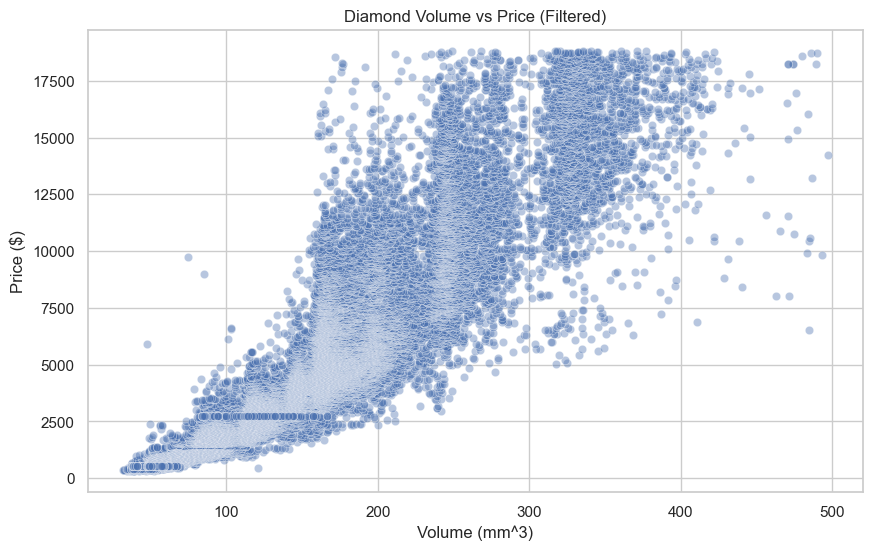

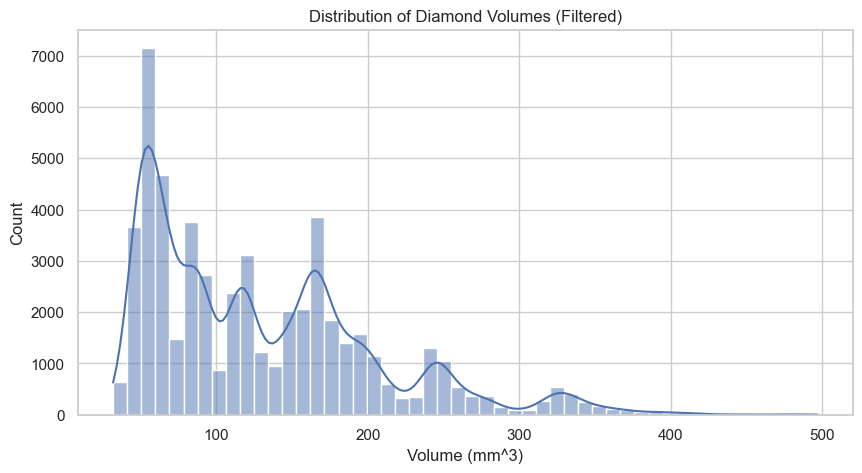

In [18]:
# Filter
df_filtered = df[(df['volume'] > 0) & (df['volume'] < 500)]

# Scatter Plot: Volume vs Price (filtered)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='volume', y='price', alpha=0.4)
plt.title('Diamond Volume vs Price (Filtered)')
plt.xlabel('Volume (mm^3)')
plt.ylabel('Price ($)')
plt.show()

# Histogram: Volume Distribution (filtered)
plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['volume'], bins=50, kde=True)
plt.title('Distribution of Diamond Volumes (Filtered)')
plt.xlabel('Volume (mm^3)')
plt.ylabel('Count')
plt.show()